<a href="https://colab.research.google.com/github/vinodvicki/simpili-learn-/blob/main/decision_tree%2C_Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#

In [5]:
df = pd.read_csv("/content/balance-scale.data")

In [6]:
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


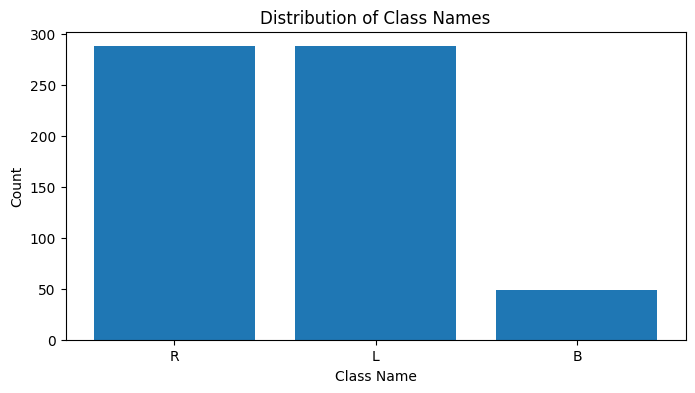

In [13]:
plt.figure(figsize =(8,4))
# Count the occurrences of each class
class_counts = df["Class Name"].value_counts()

# Create the bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.title("Distribution of Class Names")
plt.show()

In [ ]:
X = df.drop("Class Name", axis = 1)
y = df["Class Name"]

In [17]:
X =df.iloc[:,1:]
y = df.iloc[:,0]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train ,X_test ,y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.metrics import auc, roc_curve

In [23]:
clf = DecisionTreeClassifier()

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
clf.score(X_train, y_train)

1.0

In [27]:
clf.score(X_test, y_test)

0.8

In [35]:
clf.predict(X_test)

array(['L', 'R', 'L', 'B', 'L', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'B',
       'B', 'R', 'B', 'B', 'L', 'B', 'L', 'L', 'R', 'R', 'B', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'B', 'L', 'R', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'B', 'R',
       'R', 'L', 'B', 'B', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'B',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'L', 'R', 'L', 'L',
       'L', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'B', 'B', 'L', 'L', 'R', 'B', 'R', 'L', 'L', 'R',
       'L', 'R', 'L', 'B', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'L',
       'L', 'R', 'R', 'L', 'R', 'L', 'L', 'R'], dtype=object)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [50]:
estimators = DecisionTreeClassifier()
param_grid_ =  param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=estimators, param_grid= param_grid_, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.78


In [58]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, min_samples_leaf = 1, min_samples_split = 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [59]:
clf.score(X_train, y_train)

1.0

In [67]:
clf.score(X_test, y_test)

0.784

In [61]:
confusion_matrix(y_test, clf.predict(X_test), )


array([[ 0,  1,  3],
       [10, 55,  5],
       [ 8,  0, 43]])

In [63]:
classification_report(y_test, clf.predict(X_test)).split("\n")

['              precision    recall  f1-score   support',
 '',
 '           B       0.00      0.00      0.00         4',
 '           L       0.98      0.79      0.87        70',
 '           R       0.84      0.84      0.84        51',
 '',
 '    accuracy                           0.78       125',
 '   macro avg       0.61      0.54      0.57       125',
 'weighted avg       0.89      0.78      0.83       125',
 '']

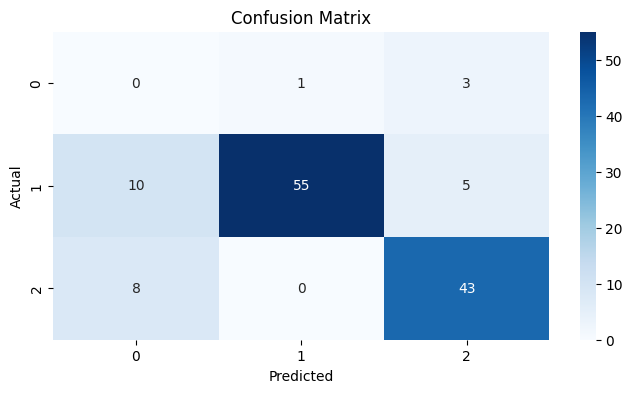

In [66]:
# prompt: visualize the confusion matrix

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, clf.predict(X_test))
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [68]:
from  sklearn.ensemble import RandomForestClassifier


In [69]:
rfc = RandomForestClassifier()

In [70]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
rfc.score(X_train, y_train)

1.0

In [72]:
rfc.score(X_test, y_test)

0.84

In [73]:
rfc.predict(X_test)

array(['L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'B',
       'B', 'R', 'L', 'B', 'L', 'L', 'L', 'L', 'R', 'R', 'B', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'B', 'L', 'R', 'L', 'L', 'L', 'R',
       'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'L', 'B', 'B', 'R', 'B', 'L', 'L', 'L', 'R', 'L', 'L', 'B',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L',
       'L', 'B', 'R', 'B', 'B', 'L', 'L', 'R', 'B', 'R', 'L', 'L', 'R',
       'L', 'R', 'L', 'B', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'L',
       'L', 'R', 'R', 'L', 'R', 'L', 'L', 'R'], dtype=object)

In [74]:
grid_search = GridSearchCV(estimator=rfc, param_grid= param_grid_, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [75]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.8560000000000001


In [76]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 15, min_samples_leaf = 4, min_samples_split = 2)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=4)

In [77]:
rfc.score(X_train, y_train)

0.906

In [78]:
rfc.score(X_test, y_test)

0.92

In [79]:
confusion_matrix(y_test, rfc.predict(X_test), )

array([[ 0,  1,  3],
       [ 2, 65,  3],
       [ 0,  1, 50]])

In [80]:
df2 = pd.read_csv('/content/petrol_consumption.csv')

In [82]:
df2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
